In [40]:
#Importamos Libreraías

import pandas as pd
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

# Cargo el DataSet agregandole 'encoding='latin1', delimiter=';'' al final ya que, de no agregarlo, visual no me lo carga.

df = pd.read_csv(r"C:\Users\Christian\OneDrive\Documentos\CoderHouse\Fundamentos para la Ciencia de Datos 1\PreEntrega 1/datos-fallecidos-en-siniestros-de-trnsito-2013-2019.csv", encoding='latin1', delimiter=';')
df

,Fecha y hora,Fecha,Hora,Hora Entera,Departamento,Localidad,Jurisdiccion,Tipo de Siniestro,Vehiculo,Rol,Edad,Sexo,Fallecido a los Dias,Otro vehiculo,Lugar del Siniestro,X,Y,Fallecidos
0,01/01/2013 23:15,01/01/2023,23:15:00,23:00,CANELONES,N/C,NACIONAL,COLISIàN CON OBSTµCULO EN CALZADA,MOTO,CONDUCTOR,34,F,0,N/C,RUTA 101 km 24,"589815,34","6143862,76",1
1,01/01/2013 23:35,01/01/2013,23:35:00,23:00,SALTO,SALTO,DEPARTAMENTAL,ATROPELLO DE PEATàN,PEATàN,PEATàN,52,F,0,MOTO,MAGALLANES pr¢x. Barrio Chinchurreta,"411579,77","6526872,77",1
2,03/01/2013 23:35,03/01/2013,23:35:00,23:00,PAYSANDU,N/C,NACIONAL,COLISIàN ENTRE VEHÖCULOS,AUTO,CONDUCTOR,34,M,8,CAMION,RUTA 3 km. 358,"412321,54","6407067,58",1
3,04/01/2013 7:10,04/01/2013,7:10:00,7:00,COLONIA,N/C,NACIONAL,DESPISTE,AUTO,CONDUCTOR,49,F,1,N/C,RUTA 21 esq. Dr Irastorza,"379424,37","6240356,26",1
4,04/01/2013 11:00,04/01/2013,11:00:00,11:00,CANELONES,PROGRESO,DEPARTAMENTAL,DESPISTE,AUTO,CONDUCTOR,91,M,0,N/C,CESAR MAYO GUTIERREZ senda CAMINO PELUFFO,"570675,1","6164479,53",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3427,29/12/2019 20:24,29/12/2019,20:24:00,20:00,PAYSANDU,N/C,NACIONAL,COLISIàN ENTRE VEHÖCULOS,AUTO,PASAJERO,23,F,0,CAMIONETA,"RUTA 24 KM 88,000","405112,07","6404241,81",1
3428,29/12/2019 20:24,29/12/2019,20:24:00,20:00,PAYSANDU,N/C,NACIONAL,COLISIàN ENTRE VEHÖCULOS,AUTO,PASAJERO,5,M,0,CAMIONETA,"RUTA 24 KM 88,000","405112,07","6404241,81",1
3429,29/12/2019 20:24,29/12/2019,20:24:00,20:00,PAYSANDU,N/C,NACIONAL,COLISIàN ENTRE VEHÖCULOS,AUTO,CONDUCTOR,23,M,0,CAMIONETA,"RUTA 24 KM 88,000","405112,07","6404241,81",1
3430,29/12/2019 20:24,29/12/2019,20:24:00,20:00,PAYSANDU,N/C,NACIONAL,COLISIàN ENTRE VEHÖCULOS,CAMIONETA,PASAJERO,60,F,27,AUTO,"RUTA 24 KM 88,000","405112,07","6404241,81",1


In [2]:
#Verifico columnas existentes
print("Columnas existentes en el DataFrame:")
print(df.columns)

Columnas existentes en el DataFrame:
Index(['Fecha y hora', 'Fecha', 'Hora', 'Departamento', 'Localidad',
       'Jurisdiccion ', 'Tipo de Siniestro', 'Vehiculo', 'Rol', 'Edad', 'Sexo',
       'Fallecido a los Dias', 'Otro vehiculo', 'Lugar del Siniestro', 'X',
       'Y', 'Fallecidos'],
      dtype='object')


In [42]:
#Borro columnas que no me sirven:  'X', 'Y', y 'Jurisdiccion '
df = df.drop(columns=['X', 'Y', 'Jurisdiccion ', 'Lugar del Siniestro', 'Fallecidos'], errors='ignore')
df 

,Fecha y hora,Fecha,Hora,Hora Entera,Departamento,Localidad,Tipo de Siniestro,Vehiculo,Rol,Edad,Sexo,Fallecido a los Dias,Otro vehiculo
0,01/01/2013 23:15,01/01/2023,23:15:00,23:00,CANELONES,N/C,COLISIàN CON OBSTµCULO EN CALZADA,MOTO,CONDUCTOR,34,F,0,N/C
1,01/01/2013 23:35,01/01/2013,23:35:00,23:00,SALTO,SALTO,ATROPELLO DE PEATàN,PEATàN,PEATàN,52,F,0,MOTO
2,03/01/2013 23:35,03/01/2013,23:35:00,23:00,PAYSANDU,N/C,COLISIàN ENTRE VEHÖCULOS,AUTO,CONDUCTOR,34,M,8,CAMION
3,04/01/2013 7:10,04/01/2013,7:10:00,7:00,COLONIA,N/C,DESPISTE,AUTO,CONDUCTOR,49,F,1,N/C
4,04/01/2013 11:00,04/01/2013,11:00:00,11:00,CANELONES,PROGRESO,DESPISTE,AUTO,CONDUCTOR,91,M,0,N/C
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3427,29/12/2019 20:24,29/12/2019,20:24:00,20:00,PAYSANDU,N/C,COLISIàN ENTRE VEHÖCULOS,AUTO,PASAJERO,23,F,0,CAMIONETA
3428,29/12/2019 20:24,29/12/2019,20:24:00,20:00,PAYSANDU,N/C,COLISIàN ENTRE VEHÖCULOS,AUTO,PASAJERO,5,M,0,CAMIONETA
3429,29/12/2019 20:24,29/12/2019,20:24:00,20:00,PAYSANDU,N/C,COLISIàN ENTRE VEHÖCULOS,AUTO,CONDUCTOR,23,M,0,CAMIONETA
3430,29/12/2019 20:24,29/12/2019,20:24:00,20:00,PAYSANDU,N/C,COLISIàN ENTRE VEHÖCULOS,CAMIONETA,PASAJERO,60,F,27,AUTO


In [50]:
# Contar las filas del DataFrame
numero_filas = len(df)
print (numero_filas)

3432


C:\Users\Christian\AppData\Local\Temp\ipykernel_9116\3561718670.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Cantidad de Fallecimientos', y='Departamento', data=df_count, palette='viridis')


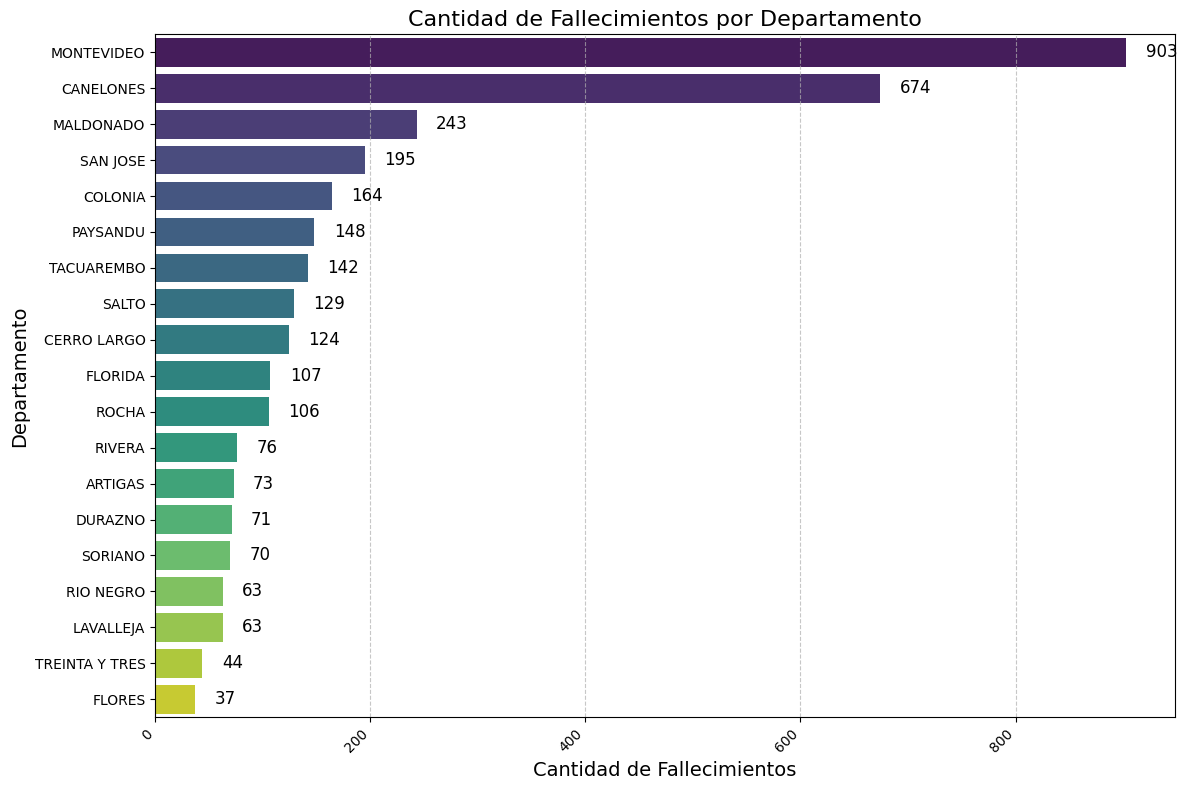

In [67]:
# Contar la cantidad de fallecimientos por departamento
df_count = df['Departamento'].value_counts().reset_index()
df_count.columns = ['Departamento', 'Cantidad de Fallecimientos']

# Ordenar de forma descendente
df_count = df_count.sort_values(by='Cantidad de Fallecimientos', ascending=False)

# Configurar el gráfico
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Cantidad de Fallecimientos', y='Departamento', data=df_count, palette='viridis')

# Añadir etiquetas con la cifra exacta en cada barra
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 0.02 * max(df_count['Cantidad de Fallecimientos']), p.get_y() + p.get_height() / 2,
            f'{int(width)}', ha='left', va='center', fontsize=12)

# Mejorar la visualización
plt.title('Cantidad de Fallecimientos por Departamento', fontsize=16)
plt.xlabel('Cantidad de Fallecimientos', fontsize=14)
plt.ylabel('Departamento', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.tight_layout()  # Ajusta el diseño para evitar superposiciones
plt.show()

C:\Users\Christian\AppData\Local\Temp\ipykernel_9116\1703463442.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='Cantidad de Fallecimientos', y='Vehiculo', data=df_count, palette='viridis')


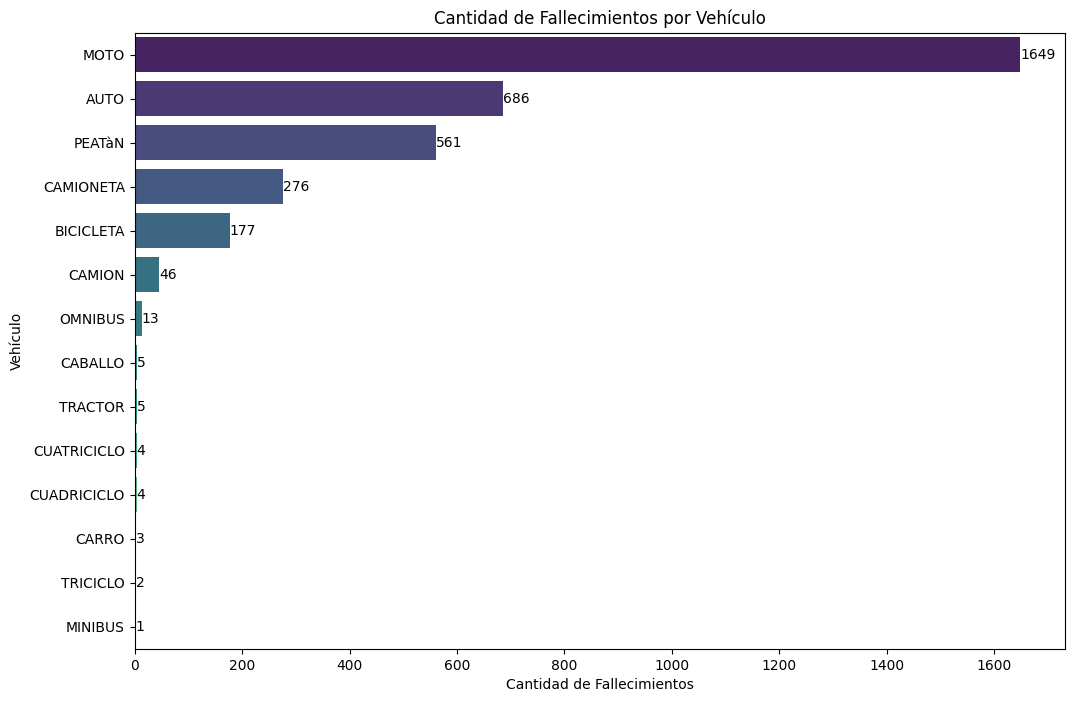

In [65]:
# Calculo la cantidad de fallecimientos por vehículo
df_count = df['Vehiculo'].value_counts().reset_index()
df_count.columns = ['Vehiculo', 'Cantidad de Fallecimientos']

# Ordeno de forma descendente
df_count = df_count.sort_values(by='Cantidad de Fallecimientos', ascending=False)

# Hago el gráfico
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x='Cantidad de Fallecimientos', y='Vehiculo', data=df_count, palette='viridis')

# Agrego los números en cada barra
for index, value in enumerate(df_count['Cantidad de Fallecimientos']):
    plt.text(value, index, f'{value}', va='center')

# Etiquetas y título
plt.title('Cantidad de Fallecimientos por Vehículo')
plt.xlabel('Cantidad de Fallecimientos')
plt.ylabel('Vehículo')

plt.show()

C:\Users\Christian\AppData\Local\Temp\ipykernel_9116\1846266515.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='Cantidad de Fallecimientos', y='Tipo de Siniestro', data=df_count, palette='viridis')


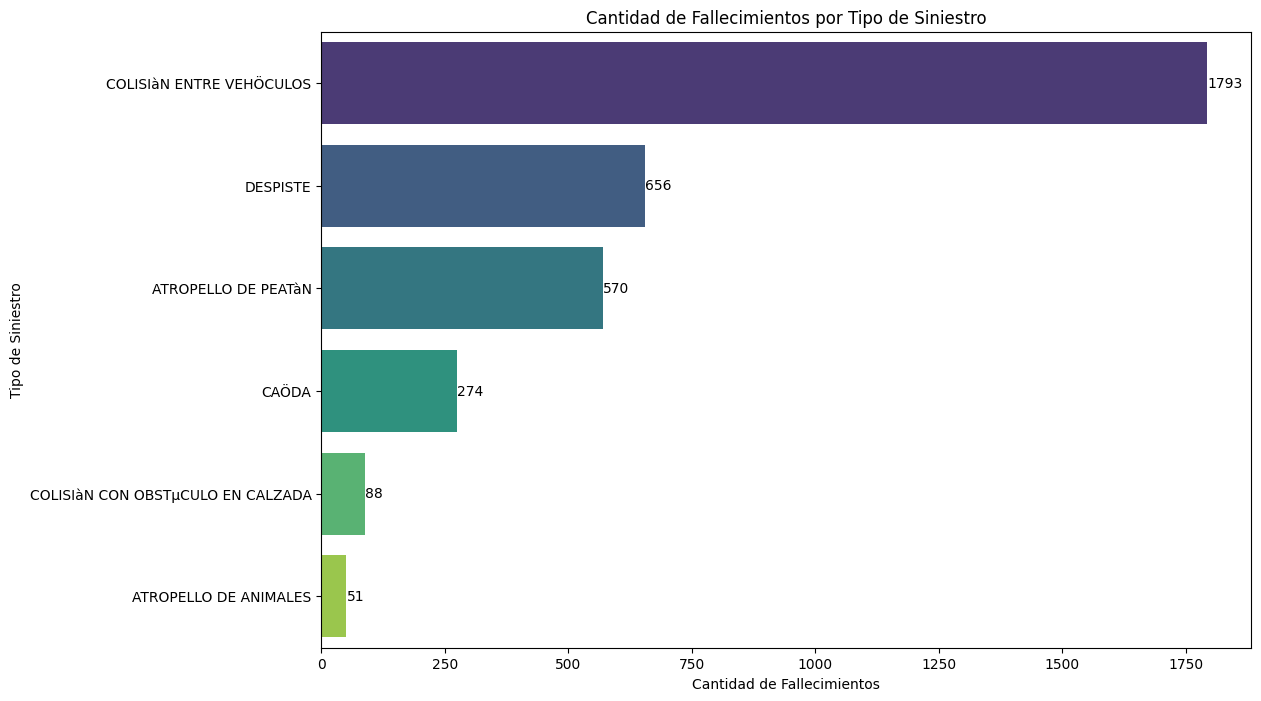

In [64]:
# Calculo la cantidad de fallecimientos por Tipo de Siniestro
df_count = df['Tipo de Siniestro'].value_counts().reset_index()
df_count.columns = ['Tipo de Siniestro', 'Cantidad de Fallecimientos']

# Ordeno de forma descendente
df_count = df_count.sort_values(by='Cantidad de Fallecimientos', ascending=False)

# Hago el gráfico
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x='Cantidad de Fallecimientos', y='Tipo de Siniestro', data=df_count, palette='viridis')

# Agrego los números en cada barra
for index, value in enumerate(df_count['Cantidad de Fallecimientos']):
    plt.text(value, index, f'{value}', va='center')

# Etiquetas y título
plt.title('Cantidad de Fallecimientos por Tipo de Siniestro')
plt.xlabel('Cantidad de Fallecimientos')
plt.ylabel('Tipo de Siniestro')

plt.show()

In [54]:
# Elimino filas donde 'edad' sea NaN o no sea numérica
df['Edad'] = pd.to_numeric(df['Edad'], errors='coerce')
df = df.dropna(subset=['Edad'])

# Calculo la edad promedio de los fallecidos
edad_promedio = df['Edad'].mean()

print(f"La edad promedio de los fallecidos es: {edad_promedio:.2f} años")

La edad promedio de los fallecidos es: 43.18 años


C:\Users\Christian\AppData\Local\Temp\ipykernel_9116\1041584642.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='Cantidad de Fallecimientos', y='Sexo', data=df_count, palette='viridis')


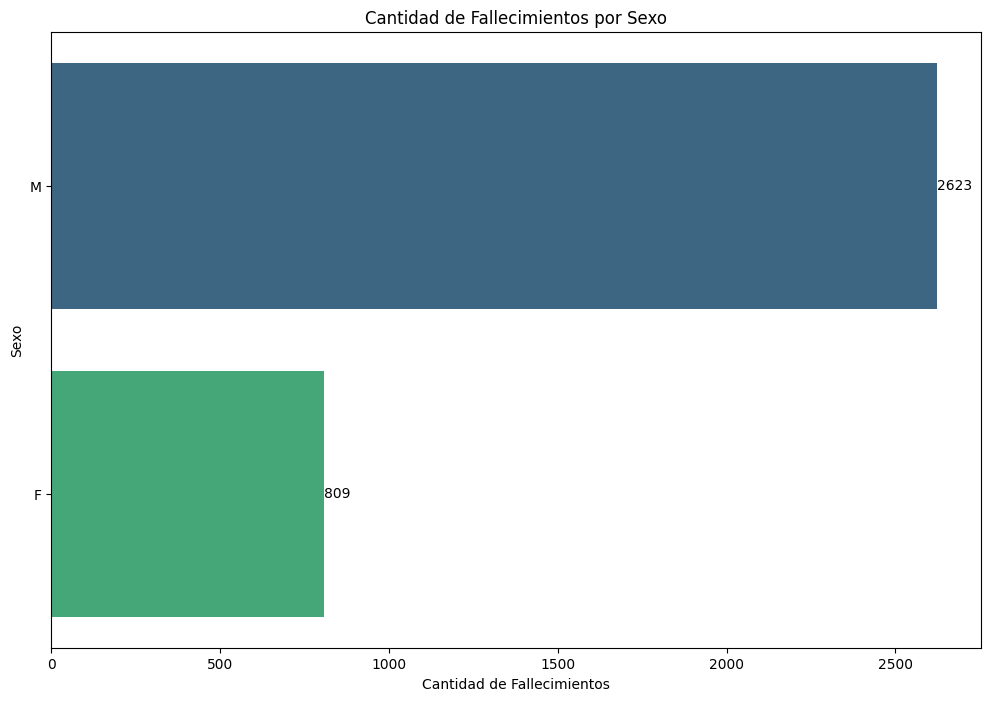

In [63]:
# Calculo la cantidad de fallecimientos por sexo
df_count = df['Sexo'].value_counts().reset_index()
df_count.columns = ['Sexo', 'Cantidad de Fallecimientos']

# Ordeno de forma descendente
df_count = df_count.sort_values(by='Cantidad de Fallecimientos', ascending=False)

# Hago el gráfico
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x='Cantidad de Fallecimientos', y='Sexo', data=df_count, palette='viridis')

# Agrego los números en cada barra
for index, value in enumerate(df_count['Cantidad de Fallecimientos']):
    plt.text(value, index, f'{value}', va='center')

# Etiquetas y título
plt.title('Cantidad de Fallecimientos por Sexo')
plt.xlabel('Cantidad de Fallecimientos')
plt.ylabel('Sexo')

plt.show()

<Axes: xlabel='Edad', ylabel='Count'>

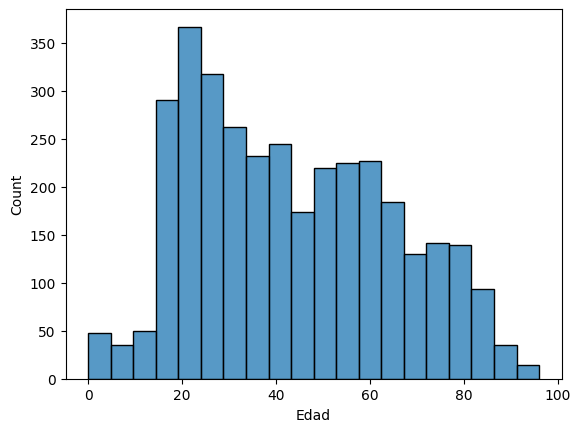

In [69]:
sns.histplot(data=df, x="Edad",bins=20)


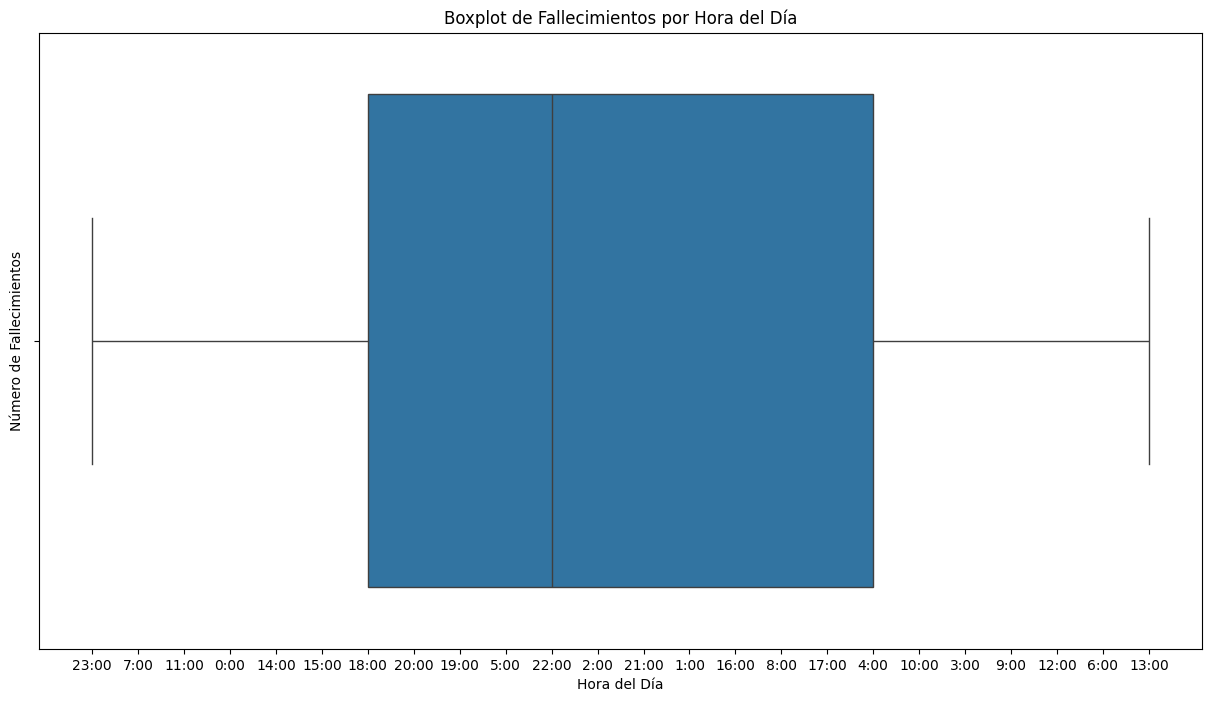

In [68]:

# Crear el boxplot
plt.figure(figsize=(15, 8))
sns.boxplot(x='Hora Entera', data=df)
plt.xlabel('Hora del Día')
plt.ylabel('Número de Fallecimientos')
plt.title('Boxplot de Fallecimientos por Hora del Día')
plt.show()

In [35]:
# Con los siguientes datos podemos concluir que:
# 1) Los hombres son el principal protagonista de los fallecimientos
# 2) El departamento más afectado por los fallecimientos es Montevideo (dada la cantidad de gente y trafico era esperable)
# 3) El vehículo con más fallecimientos es la Moto
# 4) La colisión entre vehículos es la causa que más ingerencia tiene, seguido de 'Despiste'
# 5) La edad promedio de fallecidos es de 43 años
# 6) Vemos que, en promedio, por cada fallecimiento de una mujer, mueren 3.24 hombres